In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
df= pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
print("\nData Info:")
print(df.info())
print("\nData Description:")
print(df.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None

Data 

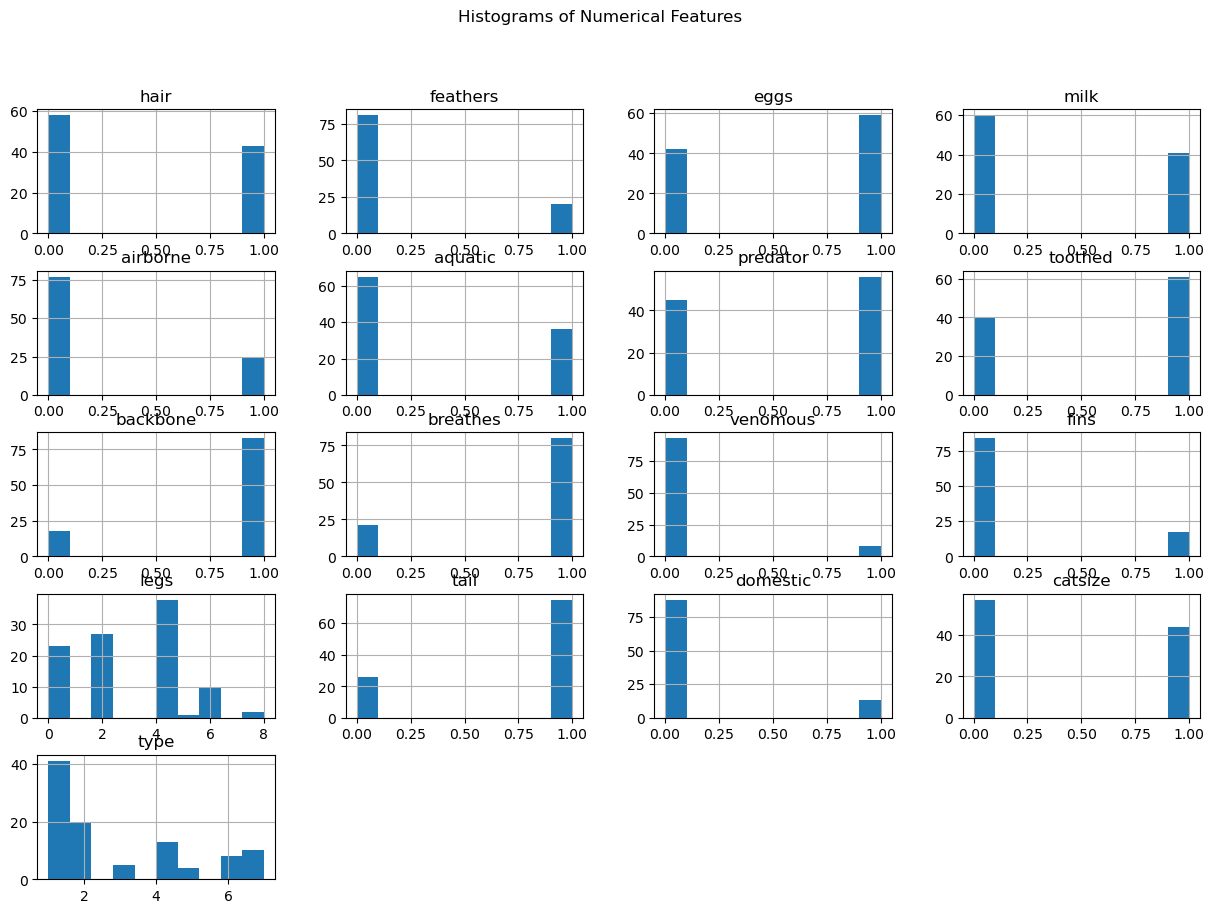

In [6]:
# Histograms for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
df[numerical_features].hist(figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

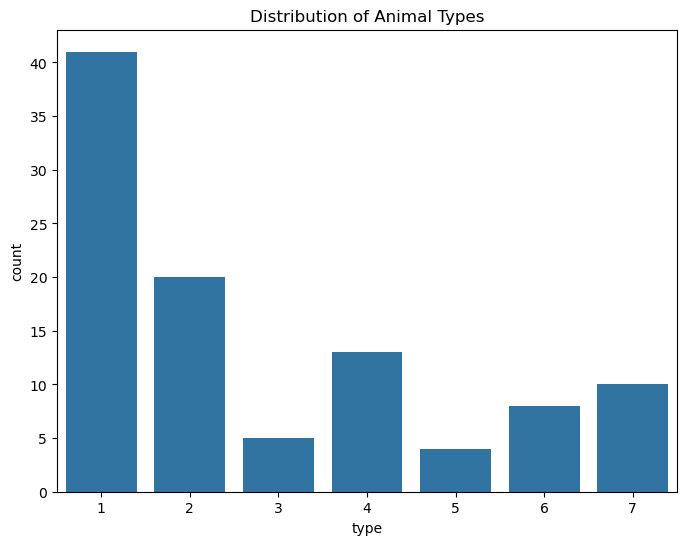

In [7]:
# Bar plot for the target variable 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title("Distribution of Animal Types")
plt.show()

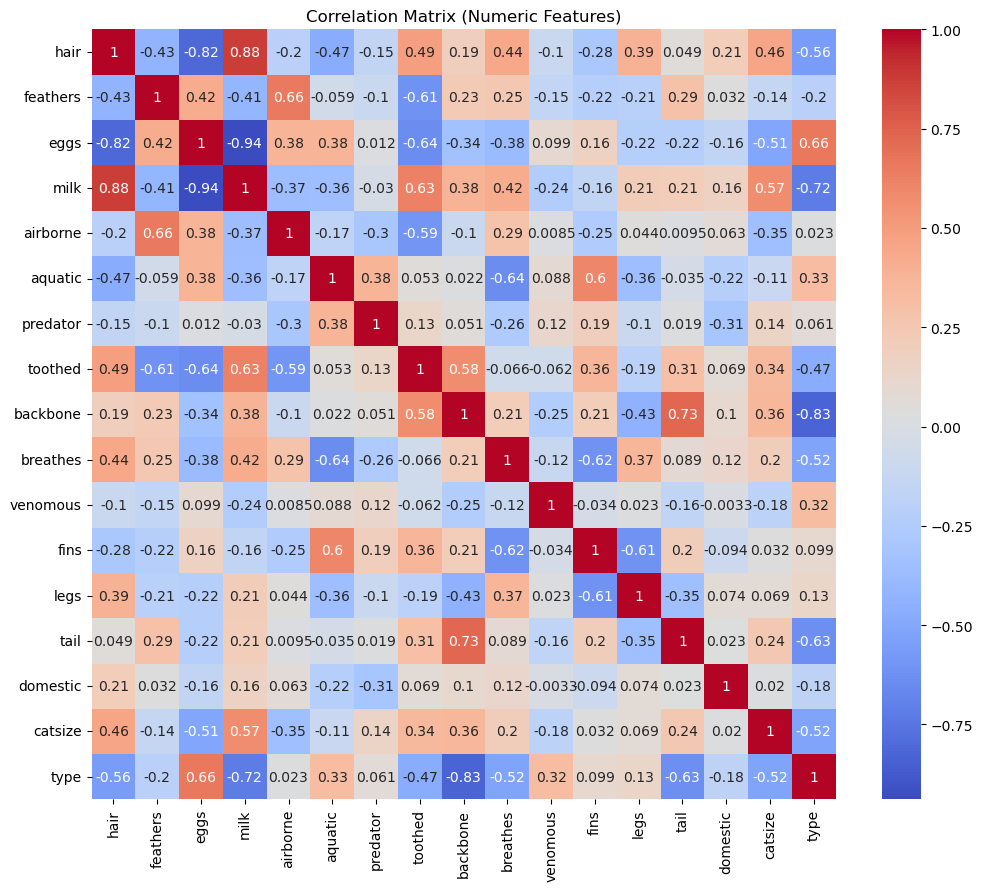

In [11]:
# Correlation matrix
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

In [27]:
# Explore target variable distribution
print(df['type'].value_counts())

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


In [13]:
# Feature Scaling
X = df.drop(['animal name', 'type'], axis=1)  # Drop non-numerical and target
y = df['type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# 3. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 4. KNN Implementation and 5. Choosing K
# Find the best K using cross-validation
k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print(f"\nBest K: {best_k}")



Best K: 3


In [30]:
# Train the KNN classifier with the best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [33]:
# 6. Evaluation
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0) # or zero_division=1
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0) # or zero_division=1
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0) # or zero_division=1

print(f"\nAccuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
# it was overfitting as the data is too clean and k was 1 so we used stratified sampling in the above line



Accuracy: 0.9523809523809523
Precision: 0.9142857142857143
Recall: 0.9523809523809523
F1-score: 0.9312169312169313


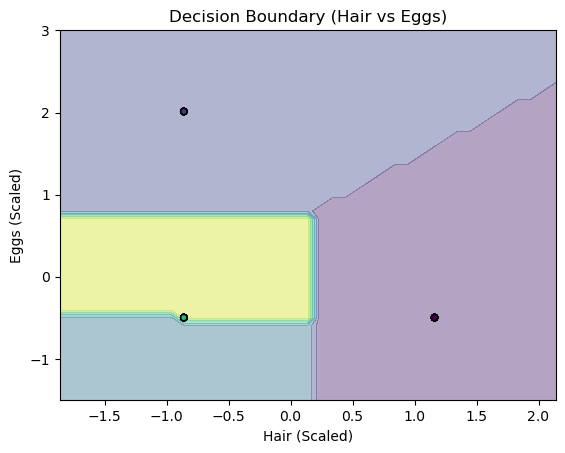

In [36]:
# 7. Decision Boundary Visualization (for 2 features only)
# Select two features for visualization (e.g., 'hair' and 'eggs')
if X_train.shape[1] > 2:
    X_subset = X_train[:, [0, 1]]  # Select 'hair' and 'eggs' after scaling
    X_test_subset = X_test[:, [0, 1]]

    knn_subset = KNeighborsClassifier(n_neighbors=best_k)
    knn_subset.fit(X_subset, y_train)

    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = knn_subset.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_train, s=20, edgecolor='k')
    plt.title("Decision Boundary (Hair vs Eggs)")
    plt.xlabel("Hair (Scaled)")
    plt.ylabel("Eggs (Scaled)")
    plt.show()
else:
    print("\nCannot visualize decision boundary with less than 2 features.")

# We can use PCA for dimensionality reduction and reduce the scaled features to two principal components.We visualize the decision boundaries using the PCA-reduced data as the x and y coordinates.PCA might lead to info loss as well


1. What are the key hyperparameters in KNN?

- K (Number of Neighbors): Determines how many neighbors influence classification.
- Distance Metric: Specifies how to calculate distances between points.
- Weights: Assigns importance to neighbors based on distance (uniform or distance-based).

2. What distance metrics can be used in KNN?

- Euclidean: Straight-line distance.
- Manhattan: Sum of absolute differences.
- Minkowski: Generalization of Euclidean and Manhattan.
- Cosine: Measures angle between vectors.
- Hamming: Counts differences between strings.